# EX6 - Research Algorithms

In [1]:
import warnings
import operator
import math
from scipy.optimize import fsolve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Q1

In [2]:
df  = pd.read_csv('national-budget.csv')
df.head(10)

,שנה,קוד רמה 1,שם רמה 1,קוד ושם רמה 1,קוד רמה 2,שם רמה 2,קוד ושם רמה 2,קוד סוג סעיף,שם סוג סעיף,קוד סעיף,...,סוג תקציב,הוצאה נטו,הוצאה מותנית בהכנסה,הכנסה מיועדת,הרשאה להתחייב,שיא כח אדם,עבצ,כמות,יתרת התחיבויות,תקציב קורונה
0,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,ביצוע,5548100.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
1,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,מאושר,10262268.0,0.0,0.0,0.0,2022.5,0.0,0.0,NaN,NaN
2,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,מקורי,10142268.0,0.0,0.0,0.0,2021.5,0.0,0.0,NaN,NaN
3,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,ביצוע,-682300.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
4,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,מאושר,0.0,0.0,-1744374.0,0.0,0.0,0.0,0.0,NaN,NaN
5,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,מקורי,0.0,0.0,-1745512.0,0.0,0.0,0.0,0.0,NaN,NaN
6,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,ביצוע,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
7,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,מאושר,609782.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
8,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,מקורי,609782.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,ביצוע,28517777.0,NaN,NaN,28517777.0,0.0,0.0,0.0,0.0,NaN


In [3]:
def plotIntersection(range_, f,g):
    ans = set()
    for i in range(math.ceil(range_.min()), math.ceil(range_.max())):
        if round(f(fsolve(lambda x: f(x) - g(x), i))[0], 3) == round(g(fsolve(lambda x: f(x) - g(x), i))[0], 3):
            ans.add(round(fsolve(lambda x: f(x) - g(x), i)[0], 3))
    for p in ans:  
        plt.scatter(p, f(p), c='r', zorder=3)
    plt.plot(range_, f(range_), zorder=2)  
    plt.plot(range_, g(range_), zorder=2)  
    plt.grid(zorder=1)
    plt.show()


#### examples

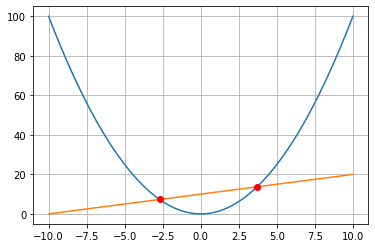

In [4]:

f = lambda x: x ** 2
g = lambda x: x + 10
plotIntersection(np.linspace(-10, 10, 1000), f, g)


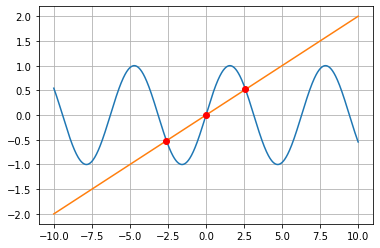

In [5]:
f = lambda x: np.sin(x)
g = lambda x: 0.2*x
plotIntersection(np.linspace(-10, 10, 1000), f, g)


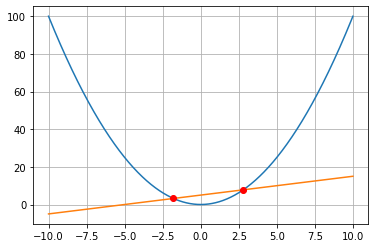

In [6]:
f = lambda x: x ** 2
g = lambda x: x+5
plotIntersection(np.linspace(-10, 10, 1000), f, g)

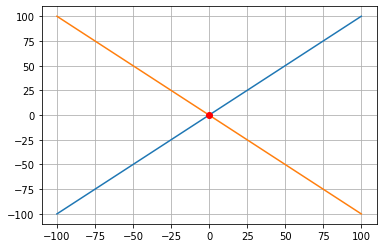

In [7]:
f = lambda x : x
g = lambda x : -x
plotIntersection(np.linspace(-100, 100, 1000), f, g)

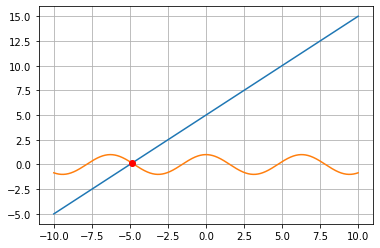

In [8]:
f = lambda x :  x+5
g = lambda x : np.cos(x)
plotIntersection(np.linspace(-10, 10, 1000), f, g)

## Q2

In [9]:
def education_budget(year: int) -> float:
    df  = pd.read_csv('national-budget.csv')
    year_ = df[df['שנה'] == year]
    expenses = year_[year_['הוצאה/הכנסה'] == 'הוצאה']
    return expenses[expenses['שם תכנית'].str.contains('חינוך')]['הוצאה נטו'].sum()

def security_budget_ratio( year: int) -> float:
    df  = pd.read_csv('national-budget.csv')
    year_ = df[df['שנה'] == year]
    sum_= year_['הוצאה נטו'].sum()
    security = year_[year_['שם תחום'] == 'בטחון']
    return security['הוצאה נטו'].sum() / sum_

def largest_budget_year(office: str) -> int: 
    df  = pd.read_csv('national-budget.csv')
    office_ = df[df['שם סעיף'] == office]
    quan = dict()
    for year in office_['שנה'].unique():
        quan[year] = office_[office_['שנה'] == year]['הוצאה נטו'].sum()
    return max(quan.items(), key=operator.itemgetter(1))[0]
       
def avg_salary (office: str, year: int) -> float:
    df  = pd.read_csv('national-budget.csv')
    df = df[df['שם סעיף'] == office]
    df= df[df['שם מיון רמה 1'] == 'שכר']
    df = df[df['שנה'] == year]
    max_emp=df['שיא כח אדם'].max()
    return round(df['הוצאה נטו'].sum() / max_emp, 3)


In [10]:
year = 1997
office='משרד הבטחון'  

print(f"The total budget of education in {year} was: {education_budget(year)}")
print(f"The Security budget in {year} was {security_budget_ratio(year)} percent of the total budget this year")
print(f"The largest budget of the ministry of {office} was in: {largest_budget_year(office)}")
print(f"The average salary in the ministry of {office} in {year} was: {avg_salary(office, year)}")

year = 2000
office='חינוך'

print(f"The total budget of education in {year} was: {education_budget(year)}")
print(f"The security budget in {year} was {security_budget_ratio(year)} percent of the total budget this year")
print(f"The largest budget of the ministry of {office} was in: {largest_budget_year(office)}")

year = 2003
office='בריאות'

print(f"The total budget of education in {year} was: {education_budget(year)}")
print(f"The Security budget in {year} was {security_budget_ratio(year)} percent of the total budget this year")
print(f"The largest budget of the ministry of {office} was in: {largest_budget_year(office)}")





The total budget of education in 1997 was: 19879143.122
The Security budget in 1997 was 0.08558129756952246 percent of the total budget this year
The largest budget of the ministry of משרד הבטחון was in: 2016
The average salary in the ministry of משרד הבטחון in 1997 was: 14537.009
The total budget of education in 2000 was: 24176679.811
The security budget in 2000 was 0.08432154700519012 percent of the total budget this year
The largest budget of the ministry of חינוך was in: 2021
The total budget of education in 2003 was: 24776284.703
The Security budget in 2003 was 0.07988180748411387 percent of the total budget this year
The largest budget of the ministry of בריאות was in: 2020


## Q3 

# 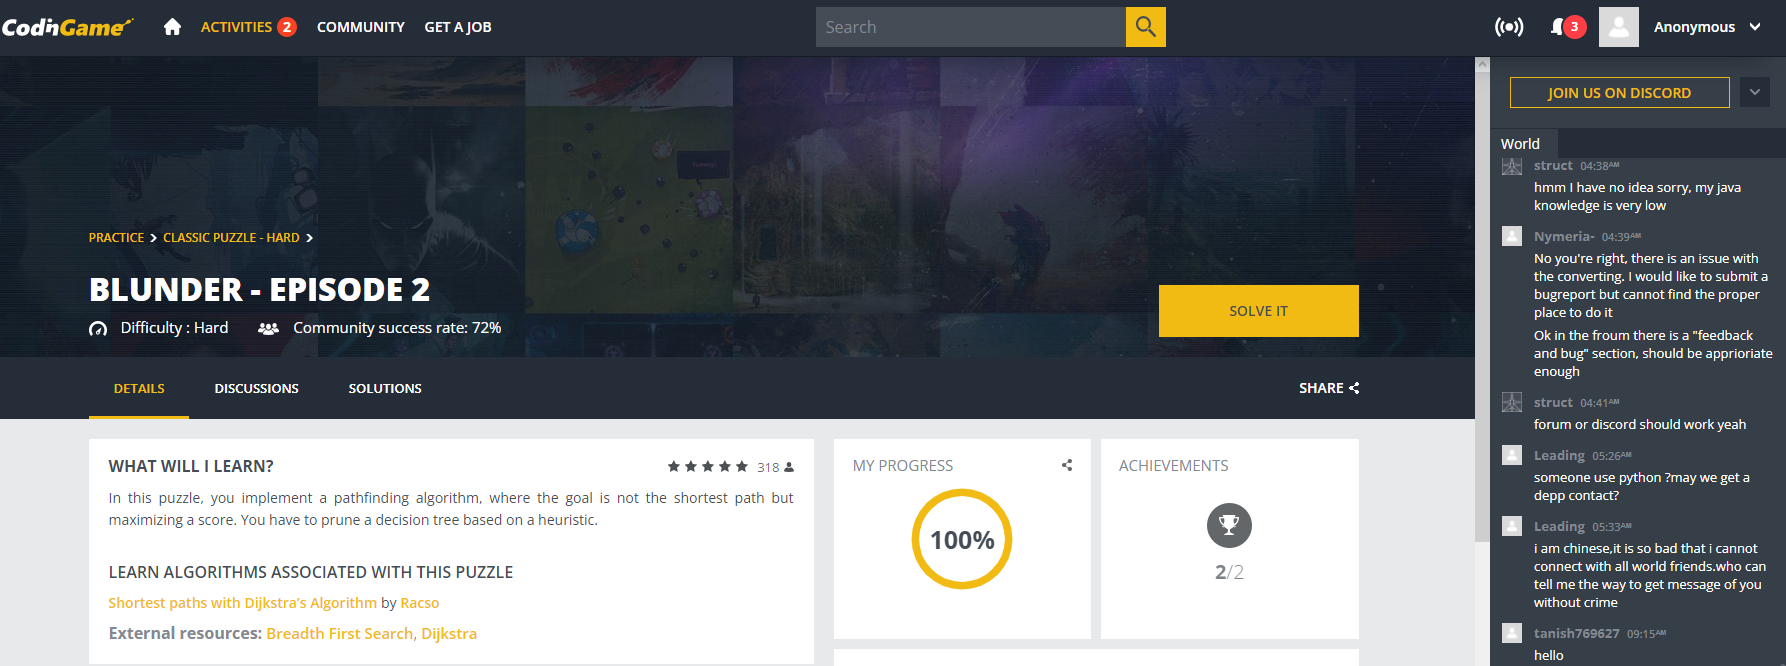

# 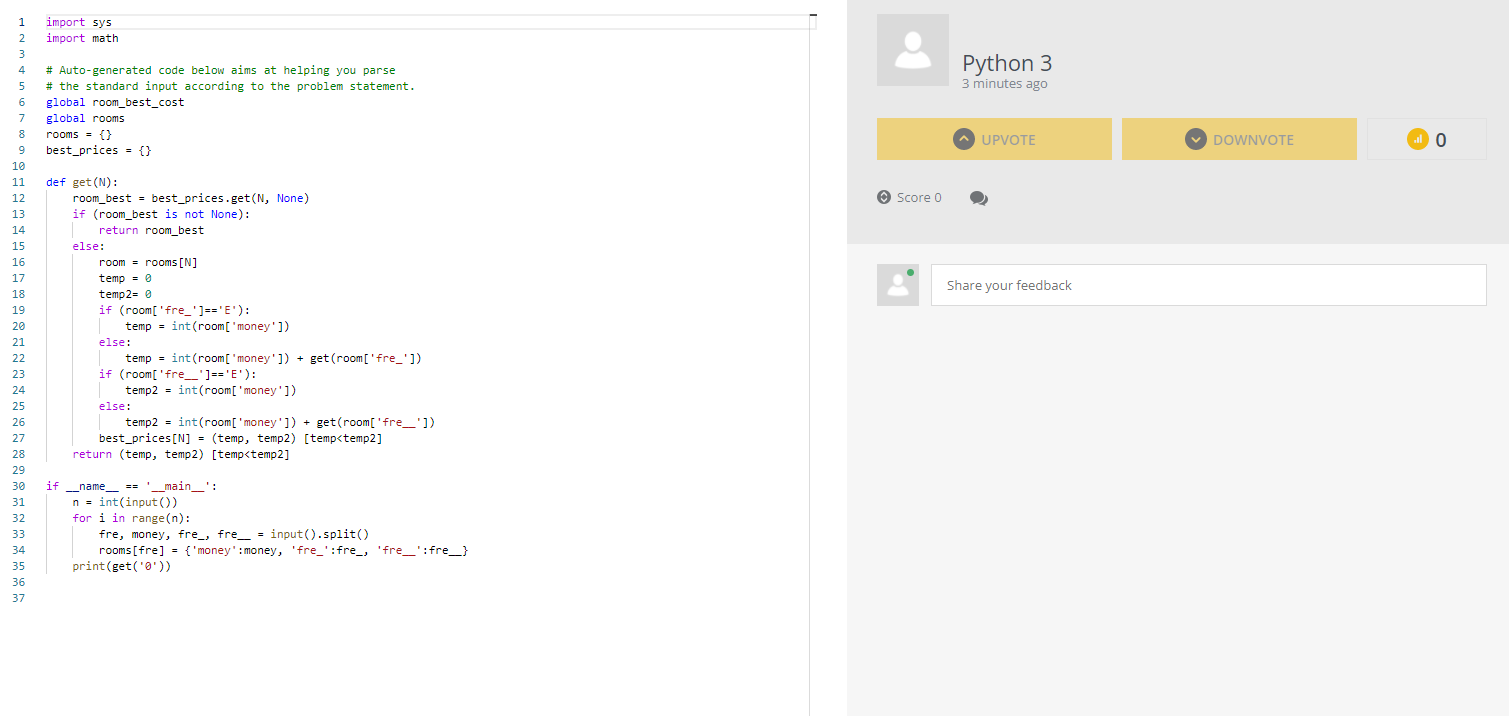